# Phân tích dữ liệu kinh doanh

Tình huống: Sau một vài năm đi làm, bạn đã tiết kiệm được một khoản tiền kha khá và bạn có ý định mở một cửa hàng tiện lợi tại Tp. HCM, thuê mặt bằng tại các thành phố lớn khá đắt đỏ và tất nhiên, dưới góc nhìn của một người chủ, tiêu chí bạn nhắm tới là sự hiệu quả khi sử dụng đất để tối đa hóa lợi nhuận. Vậy quy mô cửa hàng, diện tích mặt bằng như thế nào là phù hợp? Dựa vào tập dữ liệu được cung cấp, hãy phân tích tìm câu trả lời và đồng thời phân tích hoạt động kinh doanh của các cửa hàng tiện lợi trong tập dữ liệu để hiểu hơn về ngành kinh doanh này, từ đó có được cái nhìn tổng quan về hoạt động kinh doanh sắp tới cho cửa hàng của bạn.

Tập dữ liệu đã cho chứa thông tin thuộc tính, lịch sử kinh doanh của 45 cửa hàng tiện lợi lớn nhỏ tại Tp. HCM cùng với một số thông tin khác (dữ liệu tham khảo).

* Dữ liệu Stores (stores data-set.csv): Chứa thông tin thuộc tính của 45 cửa hàng. Thông tin các cột:
    * Store: Mã số cửa hàng
    * Type: Loại cửa hàng
    * Size: Diện tích cửa hàng (m2)

* Dữ liệu Features (features data-set.csv): Chứa dữ liệu bổ sung liên quan đến cửa hàng từ 01-01-2016 đến 28-11-2019. Thông tin các cột:
    * Store: Mã số cửa hàng
    * Date: Ngày nhập dữ liệu
    * Temperature: Nhiệt độ trung bình trong khu vực (độ C)
    * Fuel_Price: Giá xăng trong khu vực (VNĐ/lít)
    * CPI: Chỉ số giá tiêu dùng
    * Unemployment: Tỉ lệ thất nghiệp
   
* Dữ liệu Sales (sales data-set.csv): Chứa dữ liệu lịch sử bán hàng từ 01-01-2016 đến 01-12-2018. Các cột thông tin:
    * Store: Mã số cửa hàng
    * Date: Ngày nhập dữ liệu
    * Weekly_Sales: Doanh số bán hàng hàng tuần của cửa hàng (Triệu VNĐ)
    * IsHoliday: Tuần nhập dữ liệu có phải là tuần lễ đặc biệt không

# Bố cục 

## I. Load và xem dữ liệu 
* Load 3 tập dữ liệu và xem dữ liệu

## II. Làm sạch dữ liệu 
1. Làm sạch dữ liệu tập df_store (0.5 điểm)
2. Làm sạch dữ liệu tập df_feature (1 điểm)

## III. Phân tích quy mô cửa hàng 
1. Vẽ biểu đồ theo Type cửa hàng (1 điểm)
2. Kiểm định ANOVA (1 điểm)
3. Đưa ra quyết định về việc chọn quy mô cho cửa hàng (1.5 điểm)

## IV. Phân tích hoạt động kinh doanh 
1. Vẽ biểu đồ theo thời gian (1.5 điểm)
2. Vẽ biểu đồ heatmap, kiểm định hệ số tương quan Pearson (0.5 điểm)
3. Vẽ biểu đồ theo thời gian phân loại theo Type (1 điểm)

## V. Tổng kết 
* Tổng kết lại các kết luận quan trọng, đưa ra một vài ý kiến kinh doanh cho cửa hàng (1 điểm)

*Dữ liệu chỉ mang tính chất tham khảo, phục vụ mục đích học tập*

In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
plt.style.use('fivethirtyeight')  # Có thể dùng style biểu đồ này để vẽ
# Sử dụng plt.style.use('default') để trở về style ban đầu nếu cần

## I. Load và xem dữ liệu

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Load dữ liệu "stores data-set.csv" vào dataframe df_store. Hiển thị info của df_store.

In [5]:
df_store = pd.read_csv('/content/drive/MyDrive/Ex2/stores data-set.csv')

In [6]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


<details>
    <summary>Nhấn vào đây để xem kết quả!</summary>
    <pre>&lt;class 'pandas.core.frame.DataFrame'&gt;
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
</pre>
</details>

2. Hiển thị 5 dòng đầu của df_store.

In [7]:
df_store.head(5)

,Store,Type,Size
0,1,A,190
1,2,A,253
2,3,B,47
3,4,A,257
4,5,B,43


<details>
    <summary>Nhấn vào đây để xem kết quả!</summary>
    <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Store</th>
      <th>Type</th>
      <th>Size</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>A</td>
      <td>190</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>A</td>
      <td>253</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>B</td>
      <td>47</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>A</td>
      <td>257</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>B</td>
      <td>43</td>
    </tr>
  </tbody>
</table>
</div>
</details>

3. Load dữ liệu "features data-set.csv" vào dataframe df_feature. Hiển thị info của df_feature.

In [8]:
df_feature = pd.read_csv('/content/drive/MyDrive/Ex2/features data-set.csv')
df_feature['Date'] = pd.to_datetime(df_feature['Date'])

In [9]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   object        
 3   Fuel_Price    8190 non-null   object        
 4   CPI           7605 non-null   float64       
 5   Unemployment  8190 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 384.0+ KB


<details>
    <summary>Nhấn vào đây để xem kết quả!</summary>
    <pre>&lt;class 'pandas.core.frame.DataFrame'&gt;
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   object        
 3   Fuel_Price    8190 non-null   object        
 4   CPI           7605 non-null   float64       
 5   Unemployment  8190 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 384.0+ KB
</pre>
</details>

4. Hiển thị 5 dòng đầu của df_feature.

In [10]:
df_feature.head(5)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment
0,1,2016-04-22,21 °C,"15,607 VNĐ",211.096358,8.106 %
1,1,2016-11-22,19 °C,"15,461 VNĐ",211.242170,8.106 %
2,1,2016-02-10,20 °C,"15,255 VNĐ",211.289143,8.106 %
3,1,2016-02-17,23 °C,"15,540 VNĐ",211.319643,8.106 %
4,1,2016-04-23,23 °C,"15,928 VNĐ",211.350143,8.106 %


<details>
    <summary>Nhấn vào đây để xem kết quả!</summary>
    <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Store</th>
      <th>Date</th>
      <th>Temperature</th>
      <th>Fuel_Price</th>
      <th>CPI</th>
      <th>Unemployment</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>2016-04-22</td>
      <td>21 °C</td>
      <td>15,607 VNĐ</td>
      <td>211.096358</td>
      <td>8.106 %</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>2016-11-22</td>
      <td>19 °C</td>
      <td>15,461 VNĐ</td>
      <td>211.242170</td>
      <td>8.106 %</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>2016-02-10</td>
      <td>20 °C</td>
      <td>15,255 VNĐ</td>
      <td>211.289143</td>
      <td>8.106 %</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>2016-02-17</td>
      <td>23 °C</td>
      <td>15,540 VNĐ</td>
      <td>211.319643</td>
      <td>8.106 %</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>2016-04-23</td>
      <td>23 °C</td>
      <td>15,928 VNĐ</td>
      <td>211.350143</td>
      <td>8.106 %</td>
    </tr>
  </tbody>
</table>
</div>
</details>

5. Load dữ liệu "sales data-set.csv" vào dataframe df_sales. Hiển thị info của df_sales.

In [11]:
df_sales = pd.read_csv('/content/drive/MyDrive/Ex2/sales data-set.csv')
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

In [12]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   IsHoliday     6435 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 157.2 KB


<details>
    <summary>Nhấn vào đây để xem kết quả!</summary>
    <pre>&lt;class 'pandas.core.frame.DataFrame'&gt;
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   IsHoliday     6435 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 157.2 KB
</pre>
</details>

6. Hiển thị 5 dòng đầu của df_sales.

In [13]:
df_sales.head(5)

,Store,Date,Weekly_Sales,IsHoliday
0,1,2016-01-01,230.3,False
1,1,2016-01-26,256.3,False
2,1,2016-01-29,236.5,False
3,1,2016-02-10,255.5,False
4,1,2016-02-17,226.5,False


<details>
    <summary>Nhấn vào đây để xem kết quả!</summary>
    <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Store</th>
      <th>Date</th>
      <th>Weekly_Sales</th>
      <th>IsHoliday</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>2016-01-01</td>
      <td>230.3</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>2016-01-26</td>
      <td>256.3</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>2016-01-29</td>
      <td>236.5</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>2016-02-10</td>
      <td>255.5</td>
      <td>False</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>2016-02-17</td>
      <td>226.5</td>
      <td>False</td>
    </tr>
  </tbody>
</table>
</div>
</details>

## II. Làm sạch dữ liệu

1. Kiểm tra cột Type trong df_store. Có gì bất thường không? Chỉnh sửa lại dữ liệu cột Type nếu có (0.5 điểm)

In [14]:
df_store.isna().value_counts()

Store  Type   Size 
False  False  False    45
dtype: int64

In [15]:
df_store['Type']=df_store['Type'].str.upper()
df_store

,Store,Type,Size
0,1,A,190
1,2,A,253
2,3,B,47
3,4,A,257
4,5,B,43
5,6,A,253
6,7,B,90
7,8,A,193
8,9,B,157
9,10,B,157


In [16]:
df_store['Type']

0     A
1     A
2     B
3     A
4     B
5     A
6     B
7     A
8     B
9     B
10    A
11    B
12    A
13    A
14    B
15    B
16    B
17    B
18    A
19    A
20    B
21    B
22    B
23    A
24    B
25    A
26    A
27    A
28    B
29    C
30    A
31    A
32    A
33    A
34    B
35    A
36    C
37    C
38    A
39    A
40    A
41    C
42    C
43    C
44    B
Name: Type, dtype: object

<details>
    <summary>Nhấn vào đây để xem kết quả!</summary>
    <pre>Trước khi chỉnh sửa:
</pre><pre>array(['A', 'B', 'a', 'b', 'c', 'C'], dtype=object)</pre>
    <pre>Sau khi chỉnh sửa:
</pre><pre>array(['A', 'B', 'C'], dtype=object)</pre>
</details>

2. Tiến hành kiểm tra, làm sạch dữ liệu cho df_feature (1 điểm)

In [17]:
df_feature['Temperature'] = df_feature['Temperature'].str.replace(" °C","")
df_feature['Fuel_Price'] = df_feature['Fuel_Price'].str.replace(",","").str.replace(" VNĐ","")
df_feature['Unemployment'] = df_feature['Unemployment'].str.replace(" %","")
df_feature

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment
0,1,2016-04-22,21,15607,211.096358,8.106
1,1,2016-11-22,19,15461,211.242170,8.106
2,1,2016-02-10,20,15255,211.289143,8.106
3,1,2016-02-17,23,15540,211.319643,8.106
4,1,2016-04-23,23,15928,211.350143,8.106
...,...,...,...,...,...,...
8185,45,2019-06-19,38,22081,NaN,nan
8186,45,2019-04-28,39,21929,NaN,nan
8187,45,2019-11-28,40,21929,NaN,nan
8188,45,2019-07-10,41,22676,NaN,nan


In [18]:
df_feature.iloc[:, [2, 3]] = df_feature.iloc[:, [2, 3]].astype('int64')
df_feature['Unemployment'] = df_feature['Unemployment'].astype('float64')
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   int64         
 3   Fuel_Price    8190 non-null   int64         
 4   CPI           7605 non-null   float64       
 5   Unemployment  7605 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 384.0 KB


In [19]:
df_feature.isna().value_counts()

Store  Date   Temperature  Fuel_Price  CPI    Unemployment
False  False  False        False       False  False           7605
                                       True   True             585
dtype: int64

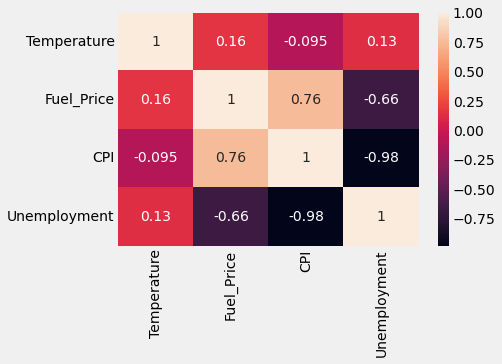

In [20]:

agg1 = {'Temperature':'mean', 'Fuel_Price':'mean', 'CPI':'mean', 'Unemployment':'mean'}
df1 = df_feature.groupby(df_feature['Date']).aggregate(agg1).reset_index()
df1

sns.heatmap(df1.corr(),annot=True)

In [21]:
df_feature['CPI'].fillna(int(df_feature['CPI'].mean()), inplace=True)

In [22]:
df_feature['Unemployment'].fillna(int(df_feature['Unemployment'].mean()), inplace=True)

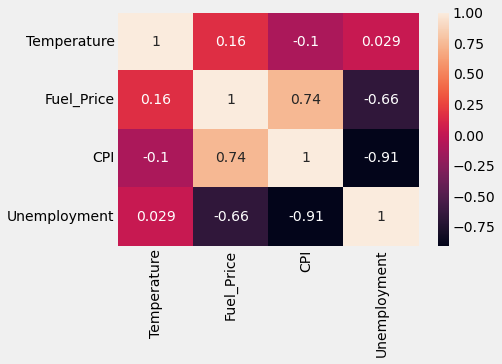

In [23]:


df2 = df_feature.groupby(df_feature['Date']).aggregate(agg1).reset_index()
df2

sns.heatmap(df2.corr(),annot=True)

In [24]:
df_feature.iloc[:, [2, 3]] = df_feature.iloc[:, [2, 3]].astype('int64')
df_feature['Unemployment'] = df_feature['Unemployment'].astype('float64')
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   int64         
 3   Fuel_Price    8190 non-null   int64         
 4   CPI           8190 non-null   float64       
 5   Unemployment  8190 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 384.0 KB


In [25]:
df_feature.isna().value_counts()

Store  Date   Temperature  Fuel_Price  CPI    Unemployment
False  False  False        False       False  False           8190
dtype: int64

In [26]:
df_feature

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment
0,1,2016-04-22,21,15607,211.096358,8.106
1,1,2016-11-22,19,15461,211.242170,8.106
2,1,2016-02-10,20,15255,211.289143,8.106
3,1,2016-02-17,23,15540,211.319643,8.106
4,1,2016-04-23,23,15928,211.350143,8.106
...,...,...,...,...,...,...
8185,45,2019-06-19,38,22081,172.000000,7.000
8186,45,2019-04-28,39,21929,172.000000,7.000
8187,45,2019-11-28,40,21929,172.000000,7.000
8188,45,2019-07-10,41,22676,172.000000,7.000


<details>
    <summary>Nhấn vào đây để xem kết quả!</summary>
    <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Store</th>
      <th>Date</th>
      <th>Temperature</th>
      <th>Fuel_Price</th>
      <th>CPI</th>
      <th>Unemployment</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>2016-04-22</td>
      <td>21</td>
      <td>15607</td>
      <td>211.096358</td>
      <td>8.106</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>2016-11-22</td>
      <td>19</td>
      <td>15461</td>
      <td>211.242170</td>
      <td>8.106</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>2016-02-10</td>
      <td>20</td>
      <td>15255</td>
      <td>211.289143</td>
      <td>8.106</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>2016-02-17</td>
      <td>23</td>
      <td>15540</td>
      <td>211.319643</td>
      <td>8.106</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>2016-04-23</td>
      <td>23</td>
      <td>15928</td>
      <td>211.350143</td>
      <td>8.106</td>
    </tr>
  </tbody>
</table>
</div>
</details>

## III. Phân tích quy mô cửa hàng

1. Dựa vào tập dữ liệu đã được làm sạch, vẽ 3 biểu đồ:
    * Biểu đồ 1 thể hiện số lượng các cửa hàng phân loại theo cột Type.
    * Biểu đồ 2 thể hiện phân phối dữ liệu cột Size của các cửa hàng phân loại theo Type.
    * Biểu đồ 3 thể hiện phân phối dữ liệu Trung bình doanh thu tuần của mỗi cửa hàng phân loại theo Type. (Gợi ý: Trung bình doanh thu tuần mỗi cửa hàng tức tại tập df_sales, nhóm dữ liệu theo cột Store và tính trung bình cho Weekly_Sales)

Bạn có nhận xét gì về biểu đồ (1 điểm)

In [27]:
agg = {'Weekly_Sales' : 'mean'}
df_sales_store_mean = df_sales.groupby(df_sales['Store']).aggregate(agg).reset_index()
df_sales_store_mean

,Store,Weekly_Sales
0,1,251.162238
1,2,311.101399
2,3,73.705594
3,4,337.408392
4,5,58.451049
5,6,253.553147
6,7,96.706993
7,8,151.918881
8,9,101.454545
9,10,304.610490


In [28]:
df_store_mod = pd.concat([df_store, df_sales_store_mean.iloc[:, 1]], axis=1)
df_store_mod

,Store,Type,Size,Weekly_Sales
0,1,A,190,251.162238
1,2,A,253,311.101399
2,3,B,47,73.705594
3,4,A,257,337.408392
4,5,B,43,58.451049
5,6,A,253,253.553147
6,7,B,90,96.706993
7,8,A,193,151.918881
8,9,B,157,101.454545
9,10,B,157,304.610490


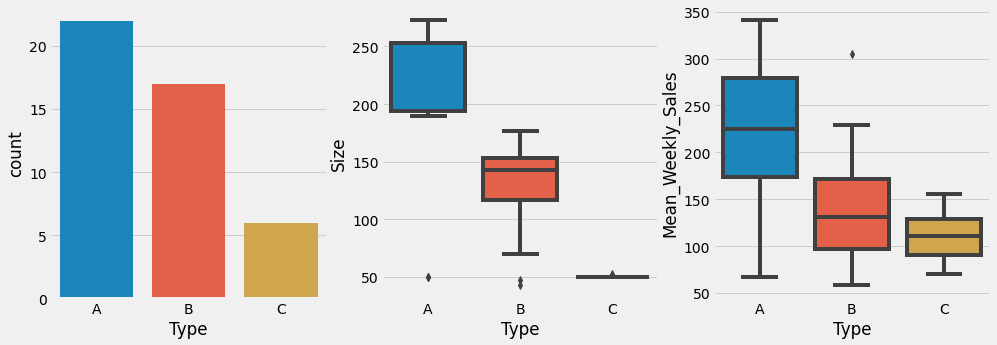

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))


sns.countplot(ax=ax[0], x='Type', data = df_store)
ax[0].set_ylabel('count')
ax[0].set_xlabel('Type')


sns.boxplot(ax=ax[1], x= 'Type', 
                      y= 'Size', 
                      data = df_store)
ax[1].set_xlabel('Type')
ax[1].set_ylabel('Size')


sns.boxplot(ax=ax[2], 
            x='Type', 
            y='Weekly_Sales', 
            data = df_store_mod)
ax[2].set_xlabel('Type')
ax[2].set_ylabel('Mean_Weekly_Sales')


plt.show()

<details>
    <summary>Nhấn vào đây để xem kết quả!</summary>
    <img src="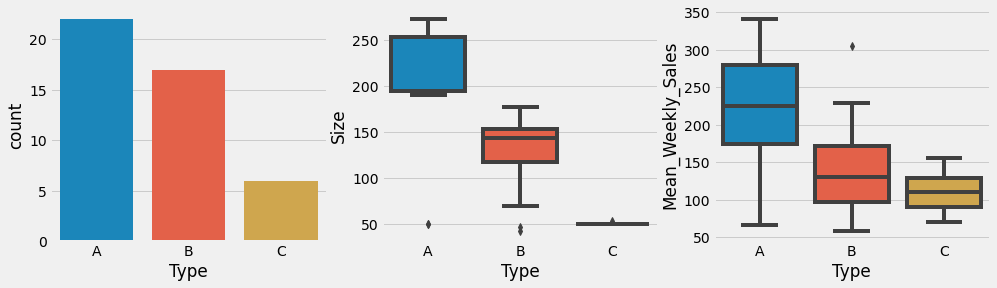
">
</details>

2. Tại biểu đồ 3, chúng ta có thể khẳng định rằng Trung bình doanh thu tuần của các cửa hàng Type B khác biệt đáng kể so với Type C không? (Sử dụng kiểm định ANOVA, chọn mức ý nghĩa alpha là 0.05) (1 điểm)

In [30]:

gp_BC = df_store_mod.query('Type != "A"')

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import scipy.stats as stats

In [32]:
mod = ols('Weekly_Sales~Type', data=df_store_mod).fit()

aov = sm.stats.anova_lm(mod, type=2)

print(aov)

            df         sum_sq       mean_sq          F    PR(>F)
Type       2.0  104811.654585  52405.827292  11.934744  0.000079
Residual  42.0  184423.295144   4391.030837        NaN       NaN


In [33]:
mod1 = ols('Weekly_Sales~Type', data=gp_BC).fit()

aov1 = sm.stats.anova_lm(mod1, type=2)

print(aov1)

            df        sum_sq      mean_sq         F   PR(>F)
Type       1.0   3720.575915  3720.575915  1.200031  0.28572
Residual  21.0  65108.395852  3100.399802       NaN      NaN


giả thuyết 

H0: trung bình cả 2 nhóm B, C bằng nhau

H1: có ít nhất trung bình của một nhóm sẽ khác các nhóm khác

p_value = 0.28572 > 0.05 nên ta không đủ cơ sở để bác bỏ giả thuyết H0 với mức ý nghĩa alpha = 5%

vậy trung bình nhóm B và C là như nhau với mức ý nghĩa 5%


3. Hãy đưa ra quyết định của bạn về việc chọn Type cho cửa hàng cùng với diện tích mặt bằng dự tính mà bạn cho là phù hợp với tiêu chí của đề bài. (Quyết định của bạn phải được dẫn chứng từ số liệu hoặc biểu đồ, bạn có thể phân tích thêm nếu cần) (1.5 điểm)

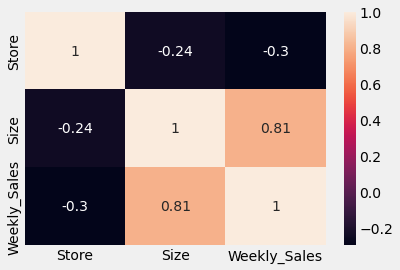

In [34]:
df_store_mod.corr()
sns.heatmap(df_store_mod.corr(),annot=True)

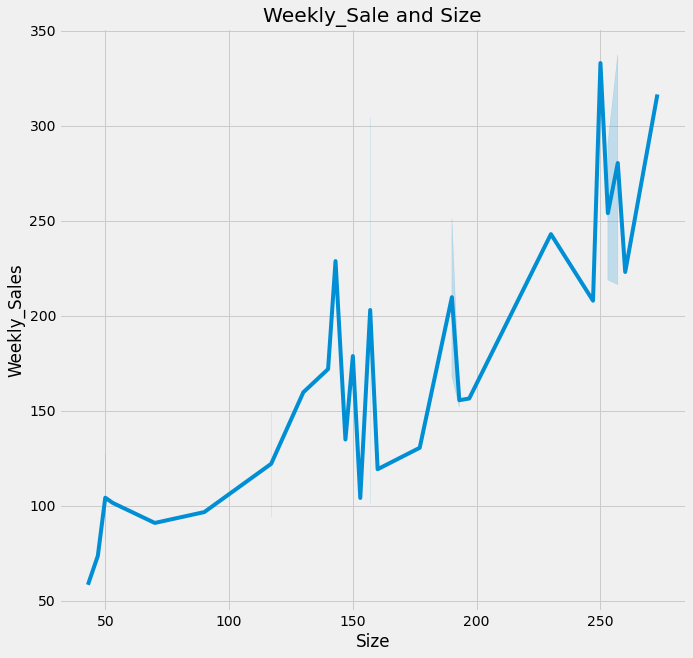

In [35]:
plt.figure(figsize=(10,10))
sns.lineplot(x = 'Size', y='Weekly_Sales', data=df_store_mod);

plt.title("Weekly_Sale and Size");


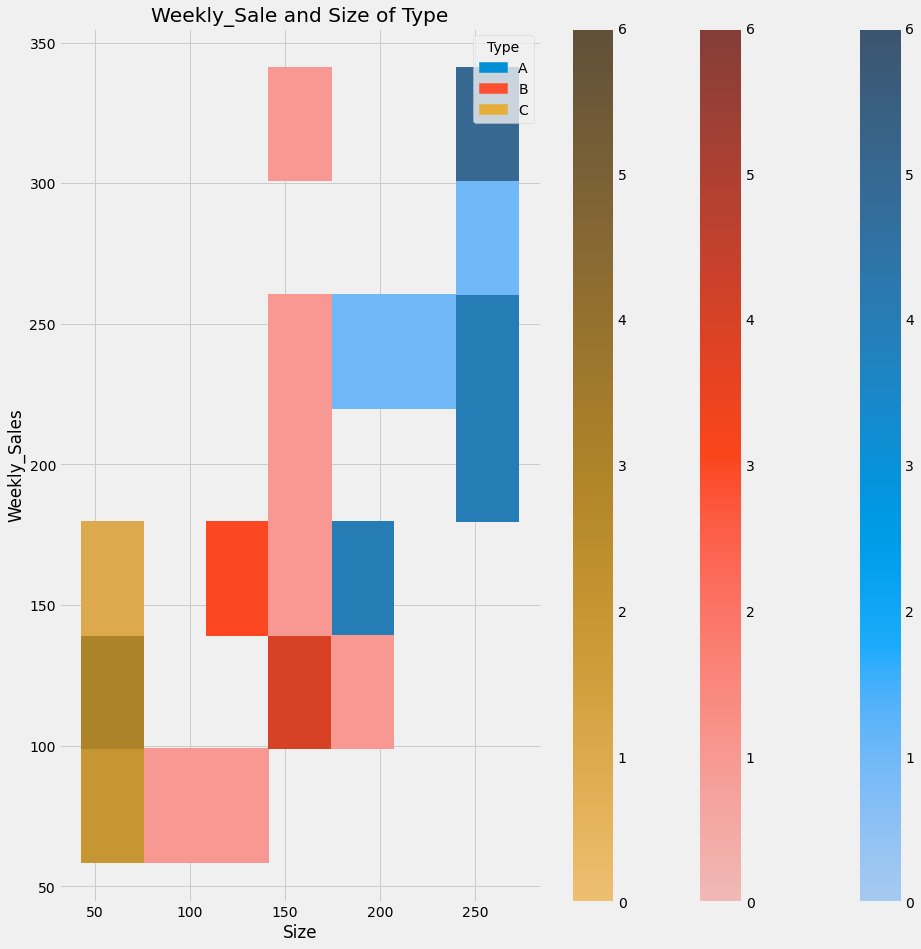

In [36]:
plt.figure(figsize=(15,15))
sns.histplot(x = 'Size', y='Weekly_Sales', hue='Type', data=df_store_mod, cbar=True, stat='count');

plt.title("Weekly_Sale and Size of Type");

Nhận Xét: 

    Có tương quan lớn giữa Weekly_Sale và Size

    Size càng lớn thì có Weekly_Sale càng nhiều

    Type C là size nhỏ nhất trong 3 type Weekly_Sale

    Type B là có size lớn hơn Type C nhưng có số lượng xuất hiện Weekly_Sale bằng với type C 

    Type A là có size lớn hơn B, C và có số lượng xuất hiện Weekly_Sale cao rất nhiều

Kết luận:

    Nếu có vốn đầu tư lớn thì sẽ chọn Type A sẽ có doanh thu tốt

    Nhưng nếu có vốn đầu tư ít thì sẽ chọn Type C sẽ có doanh thu phù hợn vốn đầu tư

## IV. Phân tích hoạt động kinh doanh

1. Vẽ biểu đồ thể hiện trung bình doanh thu tuần của các cửa hàng, nhiệt độ ngày, giá xăng dầu, chỉ số CPI, tỉ lệ thất nghiệp theo thời gian. Bạn có nhận xét gì về biểu đồ (Có thuộc tính nào tiềm năng cho việc dự đoán doanh thu cửa hàng không?) (1.5 điểm)

In [37]:
df_feature

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment
0,1,2016-04-22,21,15607,211.096358,8.106
1,1,2016-11-22,19,15461,211.242170,8.106
2,1,2016-02-10,20,15255,211.289143,8.106
3,1,2016-02-17,23,15540,211.319643,8.106
4,1,2016-04-23,23,15928,211.350143,8.106
...,...,...,...,...,...,...
8185,45,2019-06-19,38,22081,172.000000,7.000
8186,45,2019-04-28,39,21929,172.000000,7.000
8187,45,2019-11-28,40,21929,172.000000,7.000
8188,45,2019-07-10,41,22676,172.000000,7.000


In [38]:
df_sales

,Store,Date,Weekly_Sales,IsHoliday
0,1,2016-01-01,230.3,False
1,1,2016-01-26,256.3,False
2,1,2016-01-29,236.5,False
3,1,2016-02-10,255.5,False
4,1,2016-02-17,226.5,False
...,...,...,...,...
6430,45,2018-09-29,124.7,False
6431,45,2018-10-10,125.9,False
6432,45,2018-10-17,131.3,False
6433,45,2018-10-27,131.1,False


In [39]:
agg = {'Weekly_Sales' : 'mean'}
df_sales_store_mean = df_sales.groupby(df_sales['Store']).aggregate(agg).reset_index()
df_sales_store_mean

,Store,Weekly_Sales
0,1,251.162238
1,2,311.101399
2,3,73.705594
3,4,337.408392
4,5,58.451049
5,6,253.553147
6,7,96.706993
7,8,151.918881
8,9,101.454545
9,10,304.610490


In [40]:
df_feature_month = df_feature.copy()
df_feature_month['Date'] = df_feature_month['Date'].dt.to_period('M')
agg1 = {'Temperature' : 'mean', 'Fuel_Price':'mean', 'CPI':'mean', 'Unemployment':'mean'}
df_feature_month_mean = df_feature_month.groupby(df_feature_month['Date']).aggregate(agg1).reset_index()
df_feature_month_mean_t = df_feature_month_mean.query('Date <= "2018-12-01"')



In [41]:
df_feature_month_mean_t

,Date,Temperature,Fuel_Price,CPI,Unemployment
0,2016-01,33.333333,16899.451852,168.041948,8.467193
1,2016-02,25.555556,16380.637037,168.003379,8.555733
2,2016-03,26.683333,17201.072222,168.045652,8.552906
3,2016-04,25.000000,17125.168889,167.712664,8.546351
4,2016-05,32.968889,17424.000000,167.954674,8.479400
5,2016-06,36.088889,17164.577778,167.874618,8.497711
6,2016-07,37.822222,16764.872222,168.120319,8.440256
7,2016-08,37.342222,16979.875556,168.070638,8.442404
8,2016-09,35.792593,16576.037037,168.263768,8.428578
9,2016-10,29.275556,17364.164444,168.392170,8.479773


In [42]:
df_sales.Date.unique()

array(['2016-01-01T00:00:00.000000000', '2016-01-26T00:00:00.000000000',
       '2016-01-29T00:00:00.000000000', '2016-02-10T00:00:00.000000000',
       '2016-02-17T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-02T00:00:00.000000000', '2016-03-09T00:00:00.000000000',
       '2016-03-16T00:00:00.000000000', '2016-03-27T00:00:00.000000000',
       '2016-04-06T00:00:00.000000000', '2016-04-13T00:00:00.000000000',
       '2016-04-20T00:00:00.000000000', '2016-04-22T00:00:00.000000000',
       '2016-04-23T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2016-05-04T00:00:00.000000000', '2016-05-11T00:00:00.000000000',
       '2016-05-18T00:00:00.000000000', '2016-05-29T00:00:00.000000000',
       '2016-06-08T00:00:00.000000000', '2016-06-15T00:00:00.000000000',
       '2016-06-25T00:00:00.000000000', '2016-07-06T00:00:00.000000000',
       '2016-07-13T00:00:00.000000000', '2016-07-20T00:00:00.000000000',
       '2016-07-31T00:00:00.000000000', '2016-08-03

In [43]:
df_feature.Date.unique()

array(['2016-04-22T00:00:00.000000000', '2016-11-22T00:00:00.000000000',
       '2016-02-10T00:00:00.000000000', '2016-02-17T00:00:00.000000000',
       '2016-04-23T00:00:00.000000000', '2016-11-23T00:00:00.000000000',
       '2016-03-09T00:00:00.000000000', '2016-03-16T00:00:00.000000000',
       '2016-01-26T00:00:00.000000000', '2016-08-25T00:00:00.000000000',
       '2016-04-06T00:00:00.000000000', '2016-04-13T00:00:00.000000000',
       '2016-04-20T00:00:00.000000000', '2016-06-25T00:00:00.000000000',
       '2016-05-04T00:00:00.000000000', '2016-05-11T00:00:00.000000000',
       '2016-05-18T00:00:00.000000000', '2016-03-27T00:00:00.000000000',
       '2016-10-27T00:00:00.000000000', '2016-06-08T00:00:00.000000000',
       '2016-06-15T00:00:00.000000000', '2016-01-29T00:00:00.000000000',
       '2016-08-28T00:00:00.000000000', '2016-07-06T00:00:00.000000000',
       '2016-07-13T00:00:00.000000000', '2016-07-20T00:00:00.000000000',
       '2016-05-29T00:00:00.000000000', '2016-08-03

In [44]:
df_feature_mod = df_feature.query('Date <= "2018-12-01"')

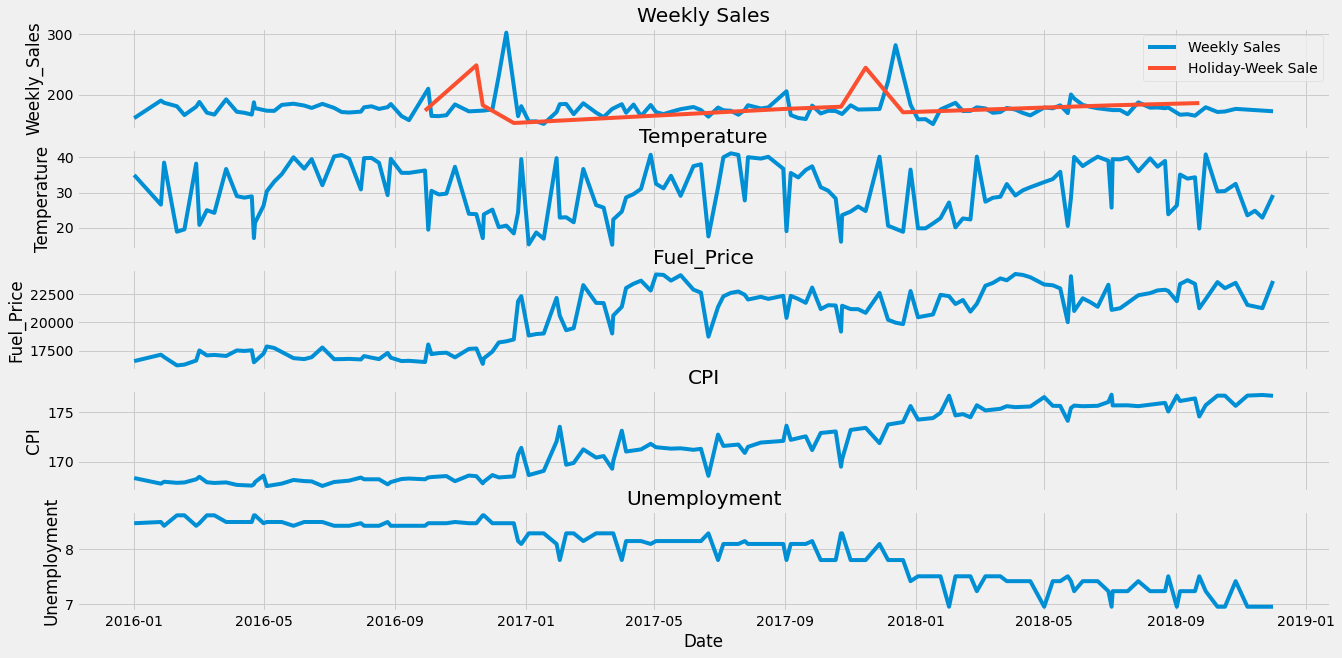

In [64]:
fig, ax = plt.subplots(5, 1, figsize=(20, 10),sharex=True)


sns.lineplot(ax=ax[0], x = 'Date', y='Weekly_Sales', data=df_sales, hue='IsHoliday', ci=None);
ax[0].legend(["Weekly Sales", "Holiday-Week Sale"])
ax[0].set_title("Weekly Sales")

sns.lineplot(ax=ax[1], x = 'Date', y='Temperature', data=df_feature_mod, ci=None);
ax[1].set_title("Temperature")

sns.lineplot(ax=ax[2], x = 'Date', y='Fuel_Price', data=df_feature_mod, ci=None);
ax[2].set_title("Fuel_Price")

sns.lineplot(ax=ax[3], x = 'Date', y='CPI', data=df_feature_mod, ci=None);
ax[3].set_title("CPI")

sns.lineplot(ax=ax[4], x = 'Date', y='Unemployment', data=df_feature_mod, ci=None);
ax[4].set_title("Unemployment")

plt.show()




Nhận Xét: 

    Plot "Trung bình doanh thu tuần" ngày thường có đỉnh doanh thu tại tháng 12 mỗi năm

    Plot "Trung bình doanh thu tuần" của Holiday không có cải thiện doanh thu, tại tháng 1 đến 9 năm 2017 doanh thu còn thấp hơn ngày thường. Đỉnh doanh thu có cao nhưng vẫ thấp hơn nhiều so với đỉnh của "Trung bình doanh thu tuần" ngày thường tại và đỉnh ở tháng 11 mỗi năm

    Plot "Trung bình doanh thu tuần" đi ngược lại với plot "nhiệt độ"

    Plot "giá xăng" và "CPI" có chiều tăng như nhau

    Plot "Tỷ lệ thất nghiệp" giảm dần

    Plot "giá xăng" và "CPI" đều có chiều đi ngược lại so với "Tỷ lệ thất nghiệp"

Kết luận:

    Tại thời gian "nhiệt độ" thấp có thể nhập nhiều hàng hóa để bán. Tại những lúc nhiệt độ cao, em có thể thy đổi sản phẩm phù hợp và đẩy quảng cáo nhiều hơn về sản phẩm mới phù hợp "nhiệt độ" cao.

    Tại lúc "CPI" và "Giá xăng" cao hạn chế mời thêm nhân viên do "Tỷ lệ thất nghiệp" thấp thì tiền phải trả để mời nhân viên mới sẽ cao.

    

<details>
    <summary>Nhấn vào đây để xem kết quả!</summary>
    <img src="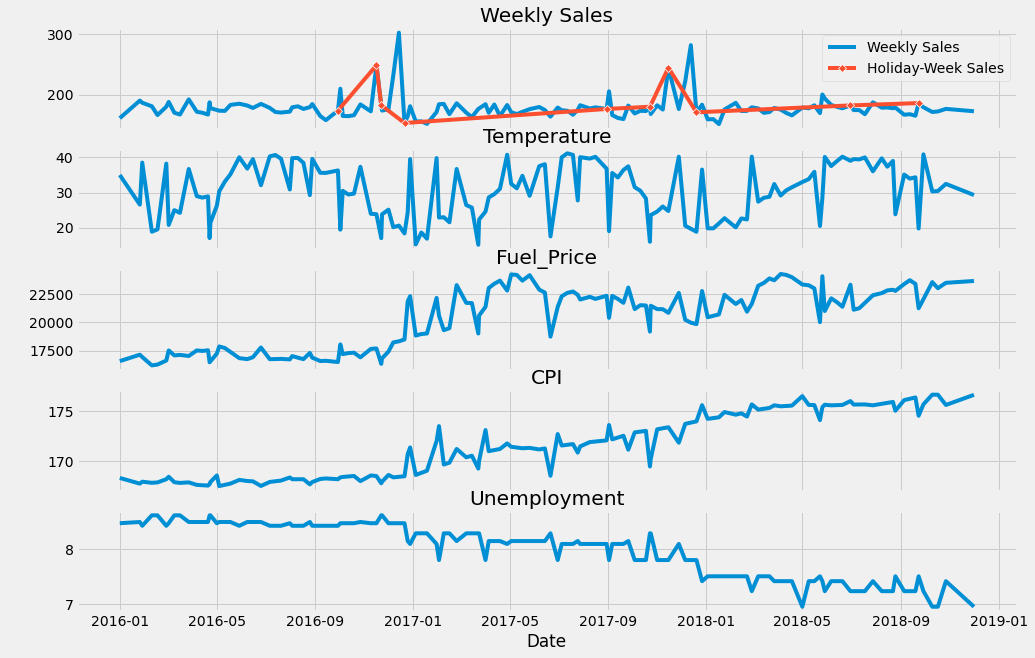
">
</details>

2. Vẽ biểu đồ heatmap thể hiện mối tương quan giữa các cột thuộc tính 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'. Dựa vào kiểm định hệ số tương quan Pearson, liệu ta có thể kết luận doanh thu có mối tương quan với nhiệt độ? (Mức ý nghĩa 0.05) (0.5 điểm)

In [46]:
df_sales_date = df_sales.copy()
agg3 = {'Weekly_Sales' : 'mean'}
df_sales_date = df_sales_date.groupby(df_sales_date['Date']).aggregate(agg3).reset_index()


In [47]:
df_feature_date = df_feature.copy()
agg4 = {'Temperature' : 'mean', 'Fuel_Price':'mean', 'CPI':'mean', 'Unemployment':'mean'}
df_feature_date = df_feature_date.groupby(df_feature_date['Date']).aggregate(agg1).reset_index()
df_feature_date = df_feature_date.query('Date <= "2018-12-01"')


In [48]:
df_1 = df_sales_date.merge(df_feature_date, how='left', on='Date')

In [49]:
df_1.isna().value_counts()

Date   Weekly_Sales  Temperature  Fuel_Price  CPI    Unemployment
False  False         False        False       False  False           143
dtype: int64

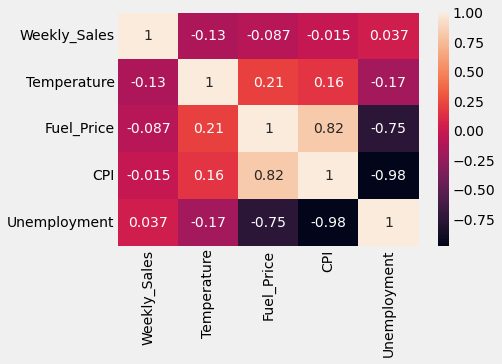

In [50]:
sns.heatmap(df_1.corr(), annot=True);

In [51]:
from scipy.stats import pearsonr
pearsonr(df_1['Weekly_Sales'], df_1['Temperature'])

(-0.13070199195955406, 0.11972397023819258)

Kết luận về hệ số tương quan Pearson:

    Với correlation coefficient là: -0.13070199195955406
    Với P-value là 0.11972397023819258 > 0.05 (Mức ý nghĩa)

* Weekly_Sales và Temperature không có ý nghĩa 

* Do correlation coefficient là âm nên hai giá trị sẽ có giá trị ngược nhau. Ví dụ khi Weekly_Sales tăng thì Temperature giảm và ngược lại


<details>
    <summary>Nhấn vào đây để xem kết quả!</summary>
    <img src="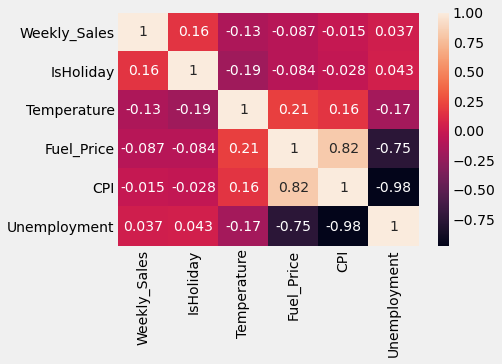
">
    <pre>Kiểm định hệ số tương quan Pearson:
</pre>
    <pre>(-0.1307019919595541, 0.11972397023819303)</pre>
</details>

3. Vẽ biểu đồ thể hiện trung bình doanh số hàng tháng của các cửa hàng phân loại theo Type. Bạn có nhận xét gì về biểu đồ (1 điểm)

In [52]:
df_sales

,Store,Date,Weekly_Sales,IsHoliday
0,1,2016-01-01,230.3,False
1,1,2016-01-26,256.3,False
2,1,2016-01-29,236.5,False
3,1,2016-02-10,255.5,False
4,1,2016-02-17,226.5,False
...,...,...,...,...
6430,45,2018-09-29,124.7,False
6431,45,2018-10-10,125.9,False
6432,45,2018-10-17,131.3,False
6433,45,2018-10-27,131.1,False


In [53]:
df_sales_monthly = pd.DataFrame()

for i in df_sales.Store.unique(): 
  df_st = df_sales.loc[df_sales['Store'] == i]
  df_st['Date'] = df_st['Date'].dt.to_period('M')
  agg5 = {'Store':'max','Weekly_Sales' : 'sum'}
  df_st = df_st.groupby(df_st['Date']).aggregate(agg5).reset_index()
  df_sales_monthly = df_sales_monthly.append(df_st, ignore_index=True)


df_sales_monthly


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,Store,Weekly_Sales
0,2016-01,1,723.1
1,2016-02,1,729.5
2,2016-03,1,977.9
3,2016-04,1,1195.1
4,2016-05,1,1222.9
...,...,...,...
1570,2018-07,45,521.1
1571,2018-08,45,505.9
1572,2018-09,45,629.1
1573,2018-10,45,388.3


In [54]:
def convert_type(Store):
    if Store == 1 or Store == 2 or Store ==  4 or Store ==  6 or Store ==  8 or Store == 11 or Store == 13  or Store == 14 or Store == 19 or Store == 20 or Store == 24 or Store == 26 or Store == 27 or Store == 28 or Store == 31 or Store == 32 or Store == 33 or Store == 34 or Store == 36 or Store == 39 or Store == 40 or Store == 41:
        return "A"
    elif Store == 3 or Store == 5 or Store == 7 or Store == 9 or Store == 10 or Store == 12 or Store == 15 or Store == 16 or Store == 17 or Store == 18 or Store == 21 or Store == 22 or Store == 23 or Store == 25 or Store == 29 or Store == 35 or Store == 45:
        return "B"
    elif Store == 30  or Store == 37 or Store == 38 or Store == 42 or Store == 43 or Store == 44:
        return "C"

In [55]:
df_sales_monthly['Type'] = df_sales_monthly['Store'].apply(lambda x: convert_type(x))
df_sales_monthly['Date'] = df_sales_monthly['Date'].astype('string') 
df_sales_monthly['Date'] = pd.to_datetime(df_sales_monthly['Date'])
df_sales_monthly = df_sales_monthly.rename({'Weekly_Sales': 'Monthly_Sales'}, axis=1)
df_sales_monthly


,Date,Store,Monthly_Sales,Type
0,2016-01-01,1,723.1,A
1,2016-02-01,1,729.5,A
2,2016-03-01,1,977.9,A
3,2016-04-01,1,1195.1,A
4,2016-05-01,1,1222.9,A
...,...,...,...,...
1570,2018-07-01,45,521.1,B
1571,2018-08-01,45,505.9,B
1572,2018-09-01,45,629.1,B
1573,2018-10-01,45,388.3,B


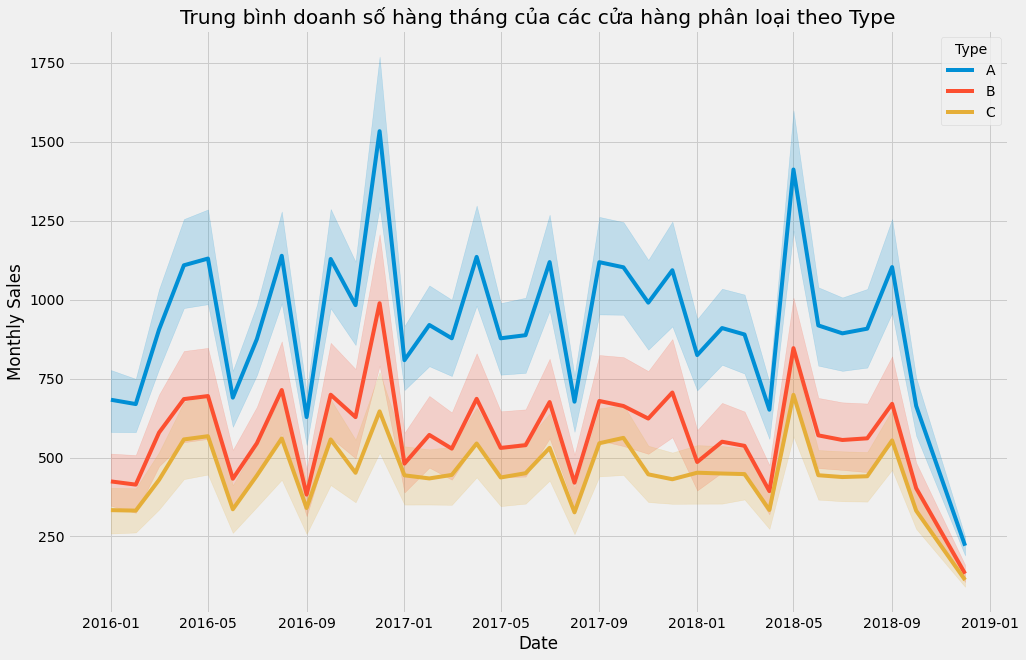

In [56]:

plt.figure(figsize=(15,10))
sns.lineplot(x= 'Date', y='Monthly_Sales', data =df_sales_monthly, hue='Type')
plt.ylabel("Monthly Sales")
plt.title("Trung bình doanh số hàng tháng của các cửa hàng phân loại theo Type");

Tại biểu đồ "Trung bình doanh số hàng tháng của các cửa hàng phân loại theo Type"

* plot của các "Type" có sự lên xuống gần như giống nhau

* Plot của "Type" B và C có khoảng cách không lớn 

* Plot "Type" có khoảng cách rất lớn với "Type" B và C. Thời gian càng vế sau khoảng cách càng lớn

* Nhưng tất cả đều lao dốc sau 9/2018

* Cả 3 "Type" đều có tăng mạnh tại khoảng 12/2016 và 05/2018

<details>
    <summary>Nhấn vào đây để xem kết quả!</summary>
    <img src="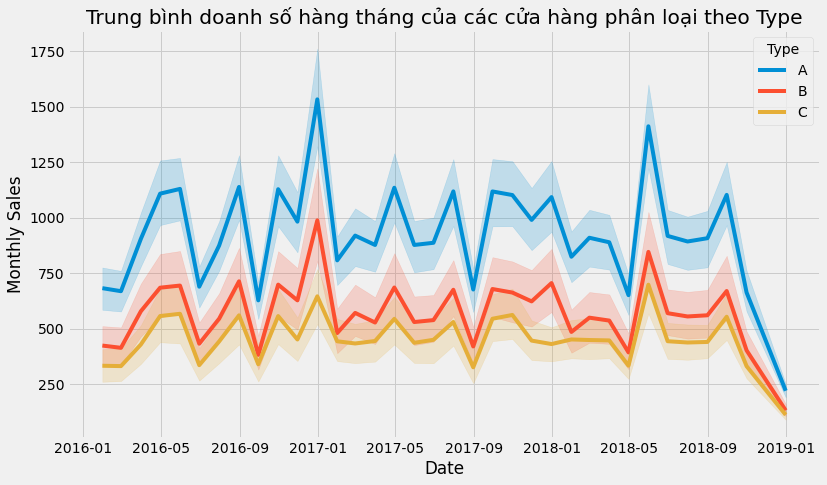
">
</details>

## V. Tổng kết

* Từ những phân tích phía trên, hãy tổng kết lại các kết luận quan trọng và đưa ra một vài ý kiến cho việc kinh doanh tại cửa hàng của bạn (1 điểm)

Kết Luận:

    Nếu có vốn đầu tư lớn thì sẽ rót vốn vào cửa hàng "Type" A với 1 diện tích lớn nhất

    Nếu có vốn đầu tư nhỏ thì sẽ rót vốn vào cửa hàng "Type" C với 1 diện tích vừa đủ

Ý kiến cho việc kinh doanh:

    Nếu lựa chọn "Type" A thì cần phải tăng cường marketing và không cần những Holiday Week Sale tại ảnh hưởng không nhiều. Lý do là: cần phải có tính cạnh tranh với số lượng nhiều

    Nếu lựa chọn "Type" C thì chỉ cần lựa "Size" vừa đủ khoảng 40-75. Không khuyến cáo chuyển lên B rồi A mà thay vào đó là để lại một số vốn lớn trực tiếp chuyển lên A. Lý do: là "Type" B với "Size" lớn hơn nhưng doanh thu không cao cho dù có cũng chỉ số ít và số lượng "Store" cũng bắt đầu nhiều nên cạnh tranh cũng sẽ cao

    Tại thời gian "nhiệt độ" thấp có thể nhập nhiều hàng hóa để bán. Tại những lúc nhiệt độ cao, em có thể thay đổi sản phẩm phù hợp và đẩy quảng cáo nhiều hơn về sản phẩm mới phù hợp "nhiệt độ" cao.

    Tại lúc "CPI" và "Giá xăng" cao hạn chế mời thêm nhân viên do "Tỷ lệ thất nghiệp" thấp thì tiền phải trả để mời nhân viên mới sẽ cao.

    Tại biểu đồ "Trung bình doanh số hàng tháng" sau 2018-12, ta có thể thấy doanh thu đang lao dốc do đó có thể có nhiều cửa hàng sẽ không có đủ vốn để xoay sở. Em có thể khảo sát nếu doanh số giảm sút chỉ vì những lý có thể khắc phục được chỉ vì thiếu vốn. Em có thể ngay lúc đó đẩu tư vào hoặc mua lại với một số vốn ít hơn nhưng vẫn sinh ra lời
